<a href="https://colab.research.google.com/github/JUMAAMOS/Business-Analytics-Python/blob/main/mlp_ass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [6]:
# Step 1: Create a synthetic dataset
np.random.seed(42)  # For reproducibility

# Generate independent variables
X1 = np.random.rand(100) * 10  # Variable 1: random values between 0 and 10
X2 = np.random.rand(100) * 20  # Variable 2: random values between 0 and 20
X3 = np.random.rand(100) * 30  # Variable 3: random values between 0 and 30


In [7]:
# Generate dependent variable with some noise
noise = np.random.randn(100) * 5
y = 2.5 * X1 + 1.5 * X2 - 0.8 * X3 + 10 + noise

In [11]:
# Create a DataFrame
data = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'y': y})

# Step 2: Split the data into training and testing sets
X = data[['X1', 'X2', 'X3']]
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Step 3: Exploratory Data Analysis (optional)
print("Data Overview:")
print(data.describe())
print("\nCorrelation Matrix:")
print(data.corr())

Data Overview:
               X1          X2          X3           y
count  100.000000  100.000000  100.000000  100.000000
mean     4.701807    9.956634   15.528040   24.616177
std      2.974894    5.862225    8.802787   15.185868
min      0.055221    0.139043    0.151848   -1.087120
25%      1.932008    4.840091    8.306396   13.021519
50%      4.641425   10.112497   16.876648   25.373662
75%      7.302031   15.323672   22.571008   33.688081
max      9.868869   19.713009   29.701616   65.904317

Correlation Matrix:
          X1        X2        X3         y
X1  1.000000 -0.034033 -0.037654  0.526359
X2 -0.034033  1.000000 -0.146354  0.644333
X3 -0.037654 -0.146354  1.000000 -0.539583
y   0.526359  0.644333 -0.539583  1.000000


In [13]:
# Step 4: Train a multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# Model coefficients and intercept
print("\nModel Coefficients:")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)


Model Coefficients:
Intercept: 7.572094662535218
Coefficients: [ 2.83201968  1.60519255 -0.7291301 ]


In [22]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Model Performance:
Mean Squared Error (MSE): 52.539489029907074
R-squared (R²): 0.6509334914703208


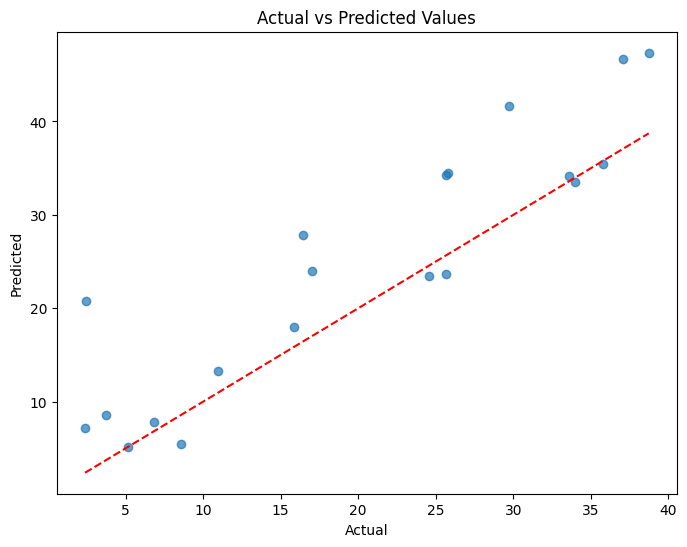

In [29]:
# Visualize actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Values")
plt.show()